<img src="assets/tree.png" alt="Drawing" style="width: 100px;"/>

# Dataset arbres : exploration préliminaire
Source : http://data.metropolegrenoble.fr/ckan/dataset/les-arbres-de-grenoble




In [13]:
from IPython.core.interactiveshell import InteractiveShell
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Quelques settings
plt.rcParams['figure.figsize'] = 15, 8
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

pd.set_option("max_columns", 100)
pd.set_option("max_colwidth", 50)

InteractiveShell.ast_node_interactivity = "all"

## Data Cleaning

In [14]:
# Chargement des données dans un dataframe pandas
raw_df = pd.read_csv('data/trees.csv')

In [15]:
raw_df.sample(n=10)

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,CODE_PARENT_DESC,ADR_SECTEUR,BIEN_REFERENCE,GENRE_BOTA,ESPECE,VARIETE,STADEDEDEVELOPPEMENT,EQUIPE,REMARQUES,ANNEEDEPLANTATION,RAISONDEPLANTATION,TRAITEMENTCHENILLES,COURRIER,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON
15783,23930,ESP29738,ESP29738,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP147,Prc Echangeurs amphi Sud,5,AR29738,Alnus,cordata,NaN,Arbre adulte,NaN,NaN,1975.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7424234711676..."
31138,16769,ESP19325,ESP19325,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP861,Ave Teisseire impair,5,AR19325,Platanus,acerifolia,NaN,Arbre adulte,NaN,NaN,1970.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7412904086939..."
2786,18095,ESP15625,ESP15625,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP910,Pl Ch Dullin partie centrale,5,AR15625,Pinus,nigra,Austriaca,Arbre adulte,NaN,NaN,1969.0,NaN,Haute,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7347257210446..."
20682,24970,ESP15930,ESP15930,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP658,Sq Capitaine Camine,3,AR15930,Tilia,tomentosa,NaN,Arbre adulte,NaN,NaN,1984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7131021756891..."
13421,26112,ESP27266,ESP27266,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP7,A A Lorraine Jaures à la Gare,1,AR27266,Aesculus,hippocastanum,NaN,Arbre adulte,NaN,NaN,1998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7176427097304..."
23708,26064,ESP27255,ESP27255,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP703,Cité Léon Jouhaux,5,AR27255,Chamaecyparis,lawsoniana,NaN,Arbre adulte,NaN,NaN,1984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7429411507980..."
10922,16723,ESP31144,ESP31144,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP1064,Ec prim du Grand Chatelet n 36,5,AR31144,Platanus,acerifolia,NaN,Arbre adulte,NaN,NaN,1970.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7490328200503..."
1318,34905,ESP36361,ESP36361,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1091,Voie E O cote voie ferree,4,AR36361,Salix,caprea,NaN,Arbre jeune,NaN,NaN,2015.0,Nouveau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7305734659605..."
26319,24171,ESP15213,ESP15213,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP397,Av St Roch St Ferjus park,5,AR15213,Acer,platanoides,NaN,Arbre adulte,NaN,NaN,1977.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7394624304200..."
17284,15420,ESP18753,ESP18753,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP495,Cimetière St Roch,2,AR18753,Chamaecyparis,lawsoniana,NaN,Arbre adulte,NaN,NaN,1977.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7410168083645..."


Remarques : 
- pas d'info sur l'année d'abattage (sont ils tous encore en vie ?) 
- Pas d'info sur le diamètre des arbres

In [16]:
raw_df['SOUS_CATEGORIE_DESC'].unique()

array(["Arbre d'enceintes fermées", 'Arbre de voirie',
       "Arbre d'espaces ouverts", 'Bois semi naturel'], dtype=object)

In [17]:
raw_df.count()

ELEM_POINT_ID            31243
CODE                     31243
NOM                      31243
GENRE                    31243
GENRE_DESC               31243
CATEGORIE                31243
CATEGORIE_DESC           31243
SOUS_CATEGORIE           31243
SOUS_CATEGORIE_DESC      31243
CODE_PARENT              31243
CODE_PARENT_DESC         31243
ADR_SECTEUR              31243
BIEN_REFERENCE           31243
GENRE_BOTA               30728
ESPECE                   29053
VARIETE                   4039
STADEDEDEVELOPPEMENT     29228
EQUIPE                       0
REMARQUES                    0
ANNEEDEPLANTATION        30801
RAISONDEPLANTATION        1050
TRAITEMENTCHENILLES       2338
COURRIER                     0
IDENTIFIANTPLU             610
TYPEIMPLANTATIONPLU        610
INTITULEPROTECTIONPLU      610
ANNEEABATTAGE                0
ESSOUCHEMENT                 0
DIAMETREARBRE                0
CAUSEABATTAGE                0
COLLECTIVITE             30804
GeoJSON                  31243
dtype: i

On ne garde que les colonnes utiles 

In [18]:
trees_df = raw_df[['GENRE_BOTA', 'ESPECE', 'VARIETE',
                   'ANNEEDEPLANTATION', 'GeoJSON']].copy()

trees_df.sample(n=10)

,GENRE_BOTA,ESPECE,VARIETE,ANNEEDEPLANTATION,GeoJSON
21400,Platanus,acerifolia,NaN,1978.0,"{""type"":""Point"",""coordinates"":[5.7451683306337..."
8101,Pinus,nigra,Austriaca,1979.0,"{""type"":""Point"",""coordinates"":[5.7292389907851..."
13832,Pyrus,communis,NaN,2015.0,"{""type"":""Point"",""coordinates"":[5.7474150412334..."
18520,Acer,platanoides,NaN,1975.0,"{""type"":""Point"",""coordinates"":[5.7120094179513..."
27481,Fagus,sylvatica,NaN,1975.0,"{""type"":""Point"",""coordinates"":[5.7371863133806..."
13361,Carpinus,betulus,NaN,2001.0,"{""type"":""Point"",""coordinates"":[5.7464461163278..."
19207,Platanus,acerifolia,NaN,1950.0,"{""type"":""Point"",""coordinates"":[5.7182752891516..."
15922,Pinus,NaN,NaN,1980.0,"{""type"":""Point"",""coordinates"":[5.7114893578960..."
23563,Platanus,acerifolia,NaN,1965.0,"{""type"":""Point"",""coordinates"":[5.7310266544916..."
26182,Cedrus,atlantica,NaN,1976.0,"{""type"":""Point"",""coordinates"":[5.7415283042447..."


## Data Exploration : Diversité

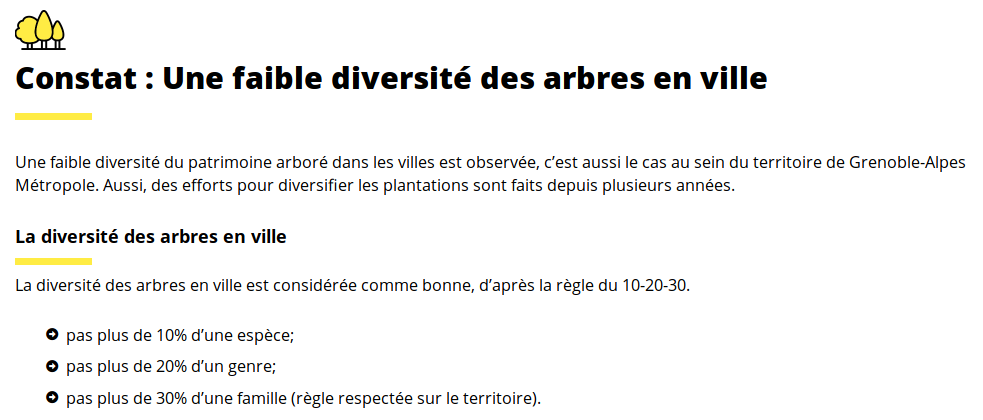

### Diversité des espèces et genres ?

In [19]:
nombre_genre_unique = trees_df.GENRE_BOTA.nunique()
nombre_espece_unique = (trees_df.GENRE_BOTA + ' ' + trees_df.ESPECE).nunique()
nombre_variete_unique = (trees_df.GENRE_BOTA + ' ' + trees_df.ESPECE +
                         ' ' + trees_df.VARIETE.replace(np.nan, '')).nunique()

print(f"Nombre de genres botaniques différents : {nombre_genre_unique}")
print(f"Nombre d'espèces différentes : {nombre_espece_unique}")
print(f"Nombre de variétés différentes : {nombre_variete_unique}")

Nombre de genres botaniques différents : 112
Nombre d'espèces différentes : 312
Nombre de variétés différentes : 493


In [20]:
# Pas plus de 20% d'un genre ?
nombre_arbres_par_genre = trees_df.GENRE_BOTA.value_counts()
genre_dominant = nombre_arbres_par_genre.index[0]
percent_genre_dominant = 100*nombre_arbres_par_genre[0]/trees_df.shape[0]

print(f'Genre botanique le plus représenté : {genre_dominant}')
print(f'Nombre de {genre_dominant} : {nombre_arbres_par_genre[0]}')
print(f"Nombre d'arbre total : {trees_df.shape[0]}")
print(f"Pourcentage de {genre_dominant} : {percent_genre_dominant:.1f} % ")

Genre botanique le plus représenté : Acer
Nombre de Acer : 5276
Nombre d'arbre total : 31243
Pourcentage de Acer : 16.9 % 


In [21]:
# Pas plus de 10% d'une espèce ?
espece_dominante = trees_df.groupby(['GENRE_BOTA', 'ESPECE']).size().idxmax()
nombre_arbre_espece_dominante = trees_df.groupby(['GENRE_BOTA', 'ESPECE']).size().max()
percent_espece_dominante = 100*nombre_arbre_espece_dominante/trees_df.shape[0]

print(f"Espèce la plus représentée : {' '.join(espece_dominante)}")
print(f"Nombre de {' '.join(espece_dominante)} : {nombre_arbre_espece_dominante}")
print(f"Pourcentage de {' '.join(espece_dominante)} : {percent_espece_dominante:.1f} % ")

Espèce la plus représentée : Platanus acerifolia
Nombre de Platanus acerifolia : 4422
Pourcentage de Platanus acerifolia : 14.2 % 


In [30]:
trees_df.groupby(['GENRE_BOTA', 'ESPECE']).size()

GENRE_BOTA  ESPECE      
Abies       concolor          5
            koreana           1
            nordmaniana      20
            pinsapo           2
Acer        buergerianum     20
                           ... 
Ulmus       parvifolia        1
            pumila            1
            resista          24
Zelkova     crenata           2
            serrata         231
Length: 312, dtype: int64

***
### Quels sont les éléments uniques dans chaque colonne ? 
***


In [22]:

liste_especes = pd.Series(zip(trees_df.GENRE_BOTA, trees_df.ESPECE)).unique()
liste_especes = filter(lambda x: np.nan not in x, liste_especes)
liste_especes = set(map(lambda x: ' '.join(x), liste_especes))

liste_especes

{'Abies concolor',
 'Abies koreana',
 'Abies nordmaniana',
 'Abies pinsapo',
 'Acer buergerianum',
 'Acer campestre',
 'Acer capillipes',
 'Acer cappadocicum',
 'Acer carpinifolia',
 'Acer davidii',
 'Acer freemanii',
 'Acer ginnala',
 'Acer griseum',
 'Acer grosseri',
 'Acer heldreichii',
 'Acer hippocastanum',
 'Acer japonicum',
 'Acer monspessulanum',
 'Acer negundo',
 'Acer nikoense',
 'Acer opalus',
 'Acer palmatum',
 'Acer platanoides',
 'Acer pseudoplatanus',
 'Acer rubrum',
 'Acer saccharinum',
 'Acer tartarica',
 'Acer triflorum',
 'Acer utilis',
 'Acer zoeschense',
 'Aesculus carnea',
 'Aesculus chandelle seche',
 'Aesculus hippocastanum',
 'Aesculus parviflora',
 'Aesculus pavia',
 'Ailanthus altissima',
 'Albizia jullibrissin',
 'Alnus cordata',
 'Alnus glutinosa',
 'Alnus incana',
 'Alnus spaethii',
 'Amélanchier alnifolia',
 'Amélanchier canadensis',
 'Amélanchier laevis',
 'Amélanchier lamarckii',
 'Amélanchier ovalis',
 'Araucaria exelsa',
 'Betula alba',
 'Betula nigra

In [23]:
trees_df.groupby(['GENRE_BOTA', 'ESPECE']).size()

GENRE_BOTA  ESPECE      
Abies       concolor          5
            koreana           1
            nordmaniana      20
            pinsapo           2
Acer        buergerianum     20
                           ... 
Ulmus       parvifolia        1
            pumila            1
            resista          24
Zelkova     crenata           2
            serrata         231
Length: 312, dtype: int64

## Visualisation des données

###  Nombre d'arbres plantés année par année

Text(0, 0.5, "Nombre d'arbres plantés")

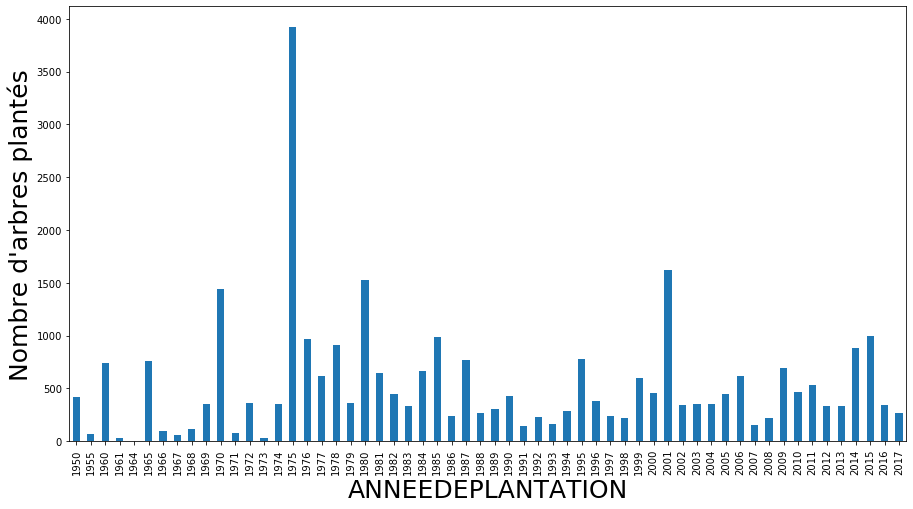

In [24]:
trees_per_year = trees_df.groupby('ANNEEDEPLANTATION').size()
trees_per_year.index = trees_per_year.index.astype(int)

ax = trees_per_year.plot(kind='bar')
ax.set_ylabel("Nombre d'arbres plantés")

Le maire le + vert => Hubert Dubedout (1975)


### Quelle répartition des arbres aujourd'hui ? 

In [25]:
repartition_series = trees_df.groupby('GENRE_BOTA').size().sort_values(ascending=False)

repartition_series

GENRE_BOTA
Acer           5276
Platanus       4663
Pinus          2118
Tilia          1770
Fraxinus       1506
               ... 
Sterculia         1
Sciadopitys       1
Rhamnus           1
Eucalyptus        1
Castanea          1
Length: 112, dtype: int64

Deux genres botaniques représentent 32% du total

([<matplotlib.patches.Wedge at 0x7f047097e5d0>,
 [Text(0.9438121018145174, 0.5649944393252585, 'Acer'),
  Text(0.01675629905373235, 1.0998723682509812, 'Platanus'),
  Text(-0.5793059725980394, -0.9350960325614903, 'Autres')],
 [Text(0.5148066009897366, 0.3081787850865046, '17%'),
  Text(0.009139799483854008, 0.5999303826823533, '15%'),
  Text(-0.3159850759625669, -0.5100523813971765, '68%')])

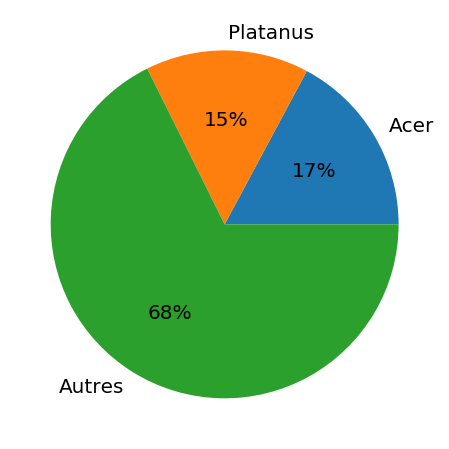

In [26]:
labels = list(repartition_series.index[0:2])
labels.append('Autres')

vals = list(repartition_series[0:2])
vals.append(np.sum(repartition_series[2:]))

fig1, ax1 = plt.subplots()
ax1.pie(vals, labels=labels, autopct='%1.0f%%',  textprops={'fontsize': 20})
plt.show()

###  Quelle évolution dans la diversité des arbres plantés ? 

In [27]:
liste_genre_dominants = list(trees_df.groupby(
    'GENRE_BOTA').size().sort_values(ascending=False)[0:3].index)

nombre_arbres_dominants_plantes = trees_df.groupby(['ANNEEDEPLANTATION', 'GENRE_BOTA']).size(
).unstack().fillna(0).loc[:, liste_genre_dominants].astype(int)

nombre_arbres_dominants_plantes.index = nombre_arbres_dominants_plantes.index.astype(
    int)

nombre_arbres_dominants_plantes.head(5)

GENRE_BOTA,Acer,Platanus,Pinus
ANNEEDEPLANTATION,,,
1950,0,381,0
1955,0,45,0
1960,69,155,64
1961,0,0,0
1964,0,7,0


Ici on regarde les pourcentages représentés par les 3 espèces les plus plantés par rapport au total

=> au début, beaucoup les mêmes espèces, et on a commencé à diversifier de plus en plus. 

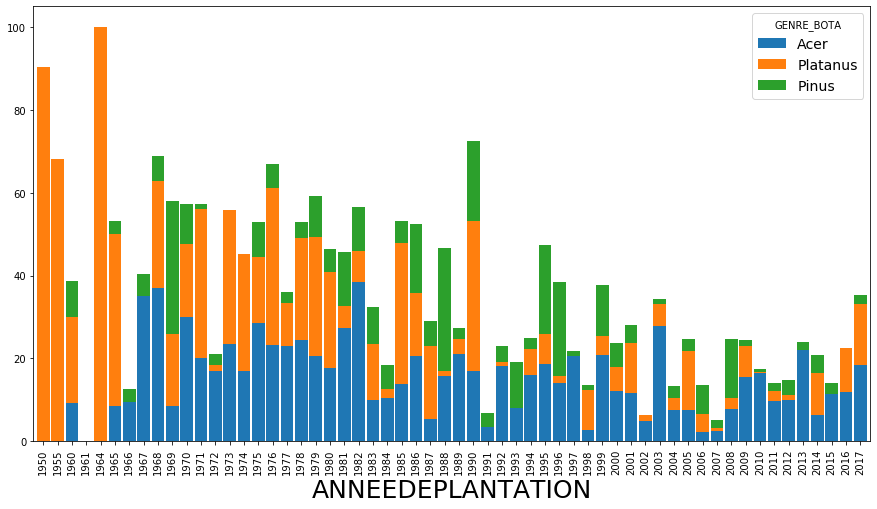

In [28]:
percentage_dominants_vs_total_arbres_plantes = nombre_arbres_dominants_plantes.div(
    trees_df.groupby('ANNEEDEPLANTATION').size(), axis=0) * 100

percentage_dominants_vs_total_arbres_plantes.loc[:, liste_genre_dominants].plot(
    kind='bar', width=0.9, stacked=True)


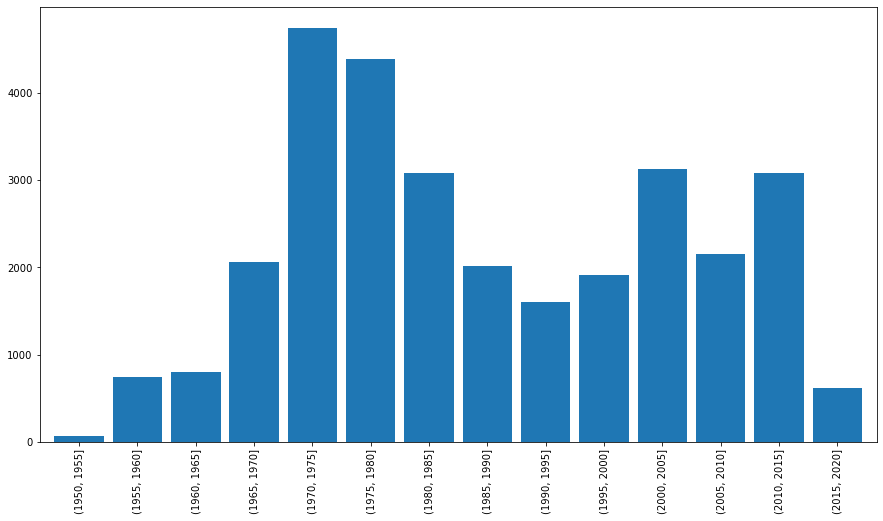

In [29]:
bins = list(range(1950, 2021, 5))
cats = pd.cut(trees_df.ANNEEDEPLANTATION.dropna(), bins)

vals = pd.value_counts(cats)
vals.sort_index().plot(kind='bar', width=0.85)
